In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For validation
from sklearn.model_selection import train_test_split as split

# For transformations and predictions
from scipy.optimize import curve_fit
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# For models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# For boosting
from sklearn.ensemble import AdaBoostClassifier

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

In [217]:
## Import the dataset
df = pd.read_csv('data.csv')
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [218]:
# Remove duplicated
df = df[~df.duplicated()==1]

In [219]:
# Transform milliseconds to minutes
df["duration_mins"] = df["duration_ms"]/60000
df.drop(columns="duration_ms", inplace=True)


In [220]:
# Checking null value in dataset
df.isnull().sum()

acousticness        0
artists             0
danceability        0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
duration_mins       0
dtype: int64

In [221]:
## Drop unnecessary columns 
track_features = df.copy()


track_features = track_features.drop(["artists","duration_mins","explicit","id","instrumentalness","key","mode","name","popularity","release_date","speechiness","tempo","year"], axis=1)
# data.loc[(df.energy >= 0.5 ) & ( df.valence >= 0.5), "mood" ] = 'Happy'
# data.loc[(df.energy >= 0.5 ) & ( df.valence < 0.5), "mood" ] = 'Angry'
# data.loc[(df.energy < 0.5 ) & ( df.valence >= 0.5), "mood" ] = 'Calm'
# data.loc[(df.energy < 0.5 ) & ( df.valence < 0.5), "mood" ] = 'Sad'

# data.loc[(data.mood == 'Happy'), "mood_type" ] = 0
# data.loc[(data.mood == 'Sad'), "mood_type" ] = 1
# data.loc[(data.mood == 'Angry'), "mood_type" ] = 2
# data.loc[(data.mood == 'Calm'), "mood_type" ] = 3
# data
km = KMeans(n_clusters=4)
km.fit(track_features)

KMeans(n_clusters=4)

In [222]:
output_km = km.predict(track_features)
df['label'] = output_km
id = ['05TpY5Fov3Hgfp8V1KILZ8', '0KVEBQA98JvkmB5ZydQ13k', '6XQHlsNu6so4PdglFkJQRJ', '1GxNPd5r7D1zChEMuMhue0','64FxpKdU055iIaMDY441Qc','7wOv2XP17ZZHzEWoBmbi9t']

# Create a list of indices corresponding to the artists above
# The first comprehension creates a list of lists, the second flattens it into one
to_drop = [df[df.id == i].index.tolist() for i in id]
to_drop = [ind for sub in to_drop for ind in sub]

# Gather the test cases
df_x = df.copy()
cases = df_x[df_x.index.isin(to_drop)]

# Remove the test cases from data
df.drop(to_drop, inplace=True)


columns = ['danceability', 'energy', 'loudness', 'acousticness', 'valence']

In [223]:
# cheerful/energetic mood
for column in columns:
    print(column, df[df['label'] == 0][column].mean())
(df[df['label'] == 0].tail(10))

danceability 0.5504013209677419
energy 0.4719387770645161
loudness -11.051431774193547
acousticness 0.5276382541662903
valence 0.576570784098387


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_mins,label
169863,0.4740,['Mac Miller'],0.677,0.330,0,2Yv2mHzr5AQavVdwQjEokV,0.000871,2,0.0640,-11.198,1,Hand Me Downs,68,2020-01-17,0.1490,68.985,0.3360,2020,4.974000,0
169865,0.3340,"['Chelsea Cutler', 'Alexander 23']",0.774,0.253,0,0AnZrWo2TuUX5BnFjsoy3N,0.000001,2,0.2210,-9.610,1,Lucky,69,2020-01-17,0.0491,92.122,0.6060,2020,2.482883,0
169867,0.5470,"['Gorillaz', 'Octavian']",0.753,0.411,1,6szrrh2IL7cgu4q6D5ryW0,0.000042,0,0.2280,-10.684,1,Friday 13th (feat. Octavian),66,2020-06-09,0.0271,100.042,0.4840,2020,3.583450,0
169871,0.3590,"['Yung Gravy', 'bbno$']",0.839,0.454,1,3PdcxgzpWzAsUGgkmykIFc,0.000000,10,0.0755,-9.090,0,Welcome to Chilis,69,2020-02-14,0.1570,159.987,0.8040,2020,2.625000,0
169881,0.1730,"['Jeremy Zucker', 'Chelsea Cutler']",0.358,0.435,0,4yQluMXsIRql36ErBHux2f,0.001060,2,0.0986,-9.198,1,you were good to me - shallou remix,59,2020-06-12,0.0717,155.908,0.3360,2020,3.820083,0
169890,0.7860,"['Kiana Ledé', '6LACK']",0.501,0.349,1,6t5MVzUCfeK1ASDMkKadxW,0.000000,3,0.1070,-10.883,0,Second Chances. (ft. 6LACK),67,2020-04-03,0.3910,72.855,0.3220,2020,3.202000,0
169893,0.3040,"['Kygo', 'Patrick Droney', 'Petey']",0.593,0.430,0,5vDjcNbN4m9fxWcrpR64Wu,0.000000,0,0.0896,-8.977,1,Say You Will,69,2020-05-29,0.0431,122.090,0.0955,2020,3.464967,0
169895,0.4950,"['Goyard Oz', '$IMEON']",0.864,0.440,1,6T78uCv6W58xPrNpS6yZZt,0.000000,5,0.3200,-11.642,0,Vibes Only,64,2020-06-05,0.5530,137.086,0.8480,2020,1.063067,0
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020,2.791133,0
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,0.539,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020,3.011667,0


In [224]:
# romantic 
for column in columns:
    print(column, df[df['label'] == 1][column].mean())
df[df['label'] == 1].tail(20)

danceability 0.38708711107007665
energy 0.09539596410303756
loudness -25.09686769458037
acousticness 0.8757166560096022
valence 0.2867876139783953


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_mins,label
169107,0.965000,['Nature Sounds'],0.4150,0.006990,0,6GfjhpnE21nxI80R0oldWJ,0.960,9,0.4570,-27.686,0,Crickets and Frogs in the Swamp at Night,49,2012-04-10,0.0494,70.193,0.03640,2012,2.007517,1
169179,0.970000,"['Steven Halpern', 'Jorge Alfano']",0.0983,0.027200,0,2MABF1tqhRc2OpEkcDN64m,0.887,2,0.1240,-21.134,1,Deep Theta 2.0 (Pt 13),57,2013-08-13,0.0402,67.071,0.07070,2013,7.428667,1
169322,0.989000,"['Johannes Brahms', 'Yo-Yo Ma']",0.2050,0.008320,0,59cPOVxrn3Yjwydl1pullI,0.598,3,0.1040,-33.503,1,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",62,2015-09-18,0.0506,77.781,0.21500,2015,1.830000,1
169331,0.992000,['Baby Lullaby Academy'],0.4930,0.156000,0,7ueCTKb8n7UOdEoM34zzYy,0.993,3,0.1130,-22.462,1,Brahms Lullaby and White Noise Ocean Waves,63,2015-05-14,0.0316,50.010,0.34700,2015,1.561250,1
169409,0.940000,['Deep Sleep Music Collective'],0.1350,0.002140,0,7MO1iUivRn2ZT7gzrJpMjl,0.897,0,0.0968,-37.424,1,Calm Ocean Waves,63,2016-11-07,0.0479,68.657,0.03590,2016,1.956133,1
169429,0.961000,['Deep Sleep Music Collective'],0.1280,0.000793,0,2IOK9ETnjo05WJYbuEg8uI,0.933,1,0.1080,-37.801,1,Moonbeam,64,2016-11-07,0.0505,77.394,0.03500,2016,2.040167,1
169446,0.989000,['David Fischbein'],0.2570,0.031700,0,2fIVdzd4JW4HnwzqrvCysf,0.944,8,0.1600,-23.030,1,Let Her Go,64,2016-10-07,0.0424,205.506,0.26800,2016,3.212117,1
169459,0.966000,['Deep Sleep Music Collective'],0.1080,0.000711,0,7qJikccNesdXmTeaXoJfhb,0.882,0,0.1080,-38.643,1,Sleep Music (Gentleness),63,2016-11-07,0.0485,81.684,0.03810,2016,2.037117,1
169522,0.913000,['Granular'],0.0000,0.000164,0,2e6fCxto7NzsnujvliBtEk,0.910,10,0.1550,-31.221,0,White Noise - 700 hz,64,2017-10-14,0.0000,0.000,0.00000,2017,3.419350,1
169529,0.127000,['Sky Fall SF'],0.1750,0.835000,0,4j6NKbX08MJRruVUttANU8,0.932,1,0.9590,-22.591,1,Rain Sounds: Rainfall,64,2017-05-05,0.0516,132.874,0.00001,2017,2.375033,1


In [225]:
# lyrical/Chill mood
for column in columns:
    print(column, df[df['label'] == 2][column].mean())
df[df['label'] == 2].tail(38)

danceability 0.5809225921067924
energy 0.7241628006740939
loudness -5.98824078101911
acousticness 0.2371883000976274
valence 0.5836058279234256


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_mins,label
169858,0.00153,"['ILLENIUM', 'Excision', 'I Prevail']",0.428,0.877,0,5dAtKXyrQoQW054LZqJ5dP,0.003720,5,0.0943,-4.722,0,Feel Something (With I Prevail),67,2020-04-03,0.0835,75.518,0.1130,2020,3.683333,2
169860,0.17100,"['Blueface', 'DaBaby']",0.914,0.583,1,5eViBefGU8Fm9OAeJVZJjW,0.000000,7,0.1390,-7.912,0,Obama (feat. DaBaby),68,2020-03-13,0.4520,134.882,0.5880,2020,2.134000,2
169861,0.76000,['Giveon'],0.640,0.355,0,6qBFSepqLCuh5tehehc1bd,0.000070,10,0.1140,-7.757,0,LIKE I WANT YOU,68,2020-03-27,0.0650,119.513,0.4370,2020,4.346267,2
169862,0.09620,['Ellie Goulding'],0.535,0.648,0,6smYfKpqsvpmqBXkLjYGJo,0.000000,10,0.1180,-4.479,1,Power,73,2020-05-21,0.1590,162.084,0.5110,2020,3.188883,2
169864,0.00480,"['Eminem', 'Don Toliver']",0.756,0.747,1,1lO9CZo6eDrOy0S7khgryG,0.005360,9,0.5880,-5.407,1,No Regrets (feat. Don Toliver),70,2020-01-17,0.0460,134.935,0.0687,2020,3.349117,2
169866,0.25500,"['Myke Towers', 'Yandel']",0.808,0.736,0,1OW47kPsWJfvhcQ7V7XwhC,0.000273,9,0.1050,-4.084,0,Mayor,67,2020-06-08,0.1140,89.983,0.8060,2020,2.184250,2
169868,0.14800,['Sam Hunt'],0.641,0.644,0,2Q04BmXs7Sr7ThizTmERj6,0.000000,1,0.0791,-5.853,1,Young Once,65,2020-04-03,0.0340,105.941,0.4710,2020,3.088883,2
169869,0.57800,['Taylor Swift'],0.502,0.462,0,3fGnrtrtL1IHSX9t4DKOYf,0.000000,11,0.7210,-7.526,1,Cornelia Street - Live From Paris,70,2020-05-18,0.0265,97.085,0.3040,2020,4.933550,2
169870,0.03440,['Brantley Gilbert'],0.308,0.616,0,2AqbOAAgaNRygNIJYcM69I,0.000004,8,0.1020,-6.947,1,Hard Days,61,2020-06-05,0.0363,72.273,0.4100,2020,2.973650,2
169872,0.10600,['Sean Paul'],0.951,0.600,0,6QvolntlpSFucqR9f91AoK,0.000000,0,0.0712,-4.675,0,Temperature,1,2020-06-12,0.0686,125.040,0.8220,2020,3.642883,2


In [226]:
# sadboy mood
for column in columns:
    print(column, df[df['label'] == 3][column].mean())
df[df['label'] == 3].tail(7)

danceability 0.49201376380859324
energy 0.24710968160573246
loudness -16.669593518443122
acousticness 0.741375552683549
valence 0.4451934180169911


,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_mins,label
169569,0.121000,['Rain Storm Sample Library'],0.153,0.99600,0,1LjsSXsKZ4mi7eP6NA8Au8,0.99900,10,0.7550,-16.574,0,Serenity Rain,64,2017-04-12,0.0470,94.976,0.00001,2017,2.950367,3
169576,0.737000,['XXXTENTACION'],0.570,0.28500,1,5xbrhx2tMMcN68IT3cJbhS,0.01330,9,0.1080,-14.125,0,Ayala (Outro),65,2017-08-25,0.0381,83.485,0.09730,2017,1.661783,3
169584,0.733000,"['prxz', 'Shiloh Dynasty']",0.825,0.20500,0,71wDmInTs45Pb2ggtLcc71,0.00086,9,0.0982,-15.117,1,Cigarettes and Sex,66,2017-10-21,0.2330,93.906,0.44900,2017,2.000983,3
169598,0.168000,['Ocean Makers'],0.166,0.09450,0,7HgBLJT1daE6jTNJ1bnCPF,0.95700,9,0.4910,-15.351,1,Pacific Rest Ocean,62,2017-05-06,0.0764,118.932,0.00001,2017,2.834133,3
169717,0.004120,['The Outdoor Library'],0.128,0.38900,0,1ODtZW4pDlZtl0UyPg0ax3,0.98800,2,0.4570,-20.070,0,Sounds of Nature: Thunder,68,2019-10-10,0.0639,95.252,0.02240,2019,2.779833,3
169743,0.000013,['Naturaleza FX'],0.000,0.00002,0,4UFlnhDTGyKvlhOQziDHkG,0.20800,1,0.3110,-16.873,1,Colors of the Rain,68,2019-10-10,0.0000,0.000,0.00000,2019,2.514650,3
169791,0.024100,['Mulatto'],0.863,0.23500,1,6tLWt7gkvvTSjS6OfJjiyJ,0.00000,1,0.1230,-15.545,1,B*tch From Da Souf,65,2019-01-14,0.6990,150.062,0.39900,2019,2.400800,3


C:\Users\egork\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mood', ylabel='count'>

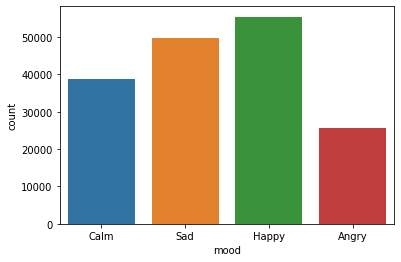

In [227]:
# Visualize number of data point for each class
sns.countplot(data['mood'])

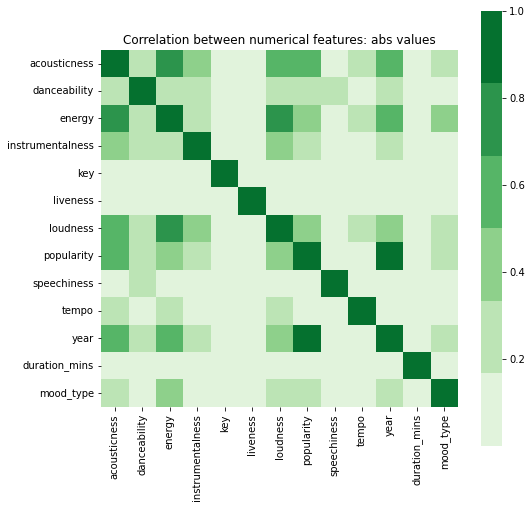

In [228]:
numeric_columns = data.columns[data.dtypes != 'object']
numeric_df = pd.DataFrame(data=data, columns=numeric_columns, index=data.index)

corr = np.abs(numeric_df.corr())
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.color_palette("Greens")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation between numerical features: abs values')
plt.show()

In [229]:
data

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,year,duration_mins,mood,mood_type
0,0.9950,0.708,0.1950,0.563000,10,0.1510,-12.428,0,0.0506,118.469,1928,2.644133,Calm,3.0
1,0.9940,0.379,0.0135,0.901000,8,0.0763,-28.454,0,0.0462,83.972,1928,4.702217,Sad,1.0
2,0.6040,0.749,0.2200,0.000000,5,0.1190,-19.924,0,0.9290,107.177,1928,1.738333,Calm,3.0
3,0.9950,0.781,0.1300,0.887000,1,0.1110,-14.734,0,0.0926,108.003,1928,3.012667,Calm,3.0
4,0.9900,0.210,0.2040,0.908000,11,0.0980,-16.829,1,0.0424,62.149,1928,11.462217,Sad,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,0.4430,0.000032,1,0.0891,-7.461,75,0.1430,100.012,2020,2.730000,Sad,1.0
169905,0.0167,0.719,0.3850,0.031300,8,0.1110,-10.907,64,0.0403,128.000,2020,2.791133,Sad,1.0
169906,0.5380,0.514,0.5390,0.002330,7,0.1080,-9.332,70,0.1050,123.700,2020,3.011667,Angry,2.0
169907,0.0714,0.646,0.7610,0.000000,1,0.2220,-2.557,70,0.0385,129.916,2020,2.788467,Angry,2.0


In [230]:

# Feature engineering
X = track_features
# Mapping class label to respected integer
y = output_km
target_names = ['Happy', 'Romantic', 'Chill', 'Sad']


In [231]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)

In [232]:
results = []

def run_model(model, alg_name):
   # build the model on training data
   model.fit(X_train, y_train)
 
   # make predictions for test data
   y_pred = model.predict(X_test)
   # calculate the accuracy score
   accuracy =  accuracy_score(y_test, y_pred)
   cm = confusion_matrix(y_test, y_pred)
   scoresDT3 = cross_val_score(model, X_test, y_test, cv=6)
   Cr = classification_report(y_test, y_pred, target_names=target_names)
   results.append((alg_name, accuracy, model))
   print("Model: ", alg_name)
   print("Accuracy on Test Set for {} = {:.2f}\n".format(alg_name,accuracy))
   print(Cr)
   print("{}: CrossVal Accuracy Mean: {:.2f} and Standard Deviation: {:.2f} \n".format(alg_name,scoresDT3.mean(), scoresDT3.std()))

In [233]:
model = DecisionTreeClassifier()
run_model(model, "Decision Tree")

Model:  Decision Tree
Accuracy on Test Set for Decision Tree = 1.00

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00     15451
    Romantic       1.00      1.00      1.00      2729
       Chill       1.00      1.00      1.00     15121
         Sad       1.00      1.00      1.00      9177

    accuracy                           1.00     42478
   macro avg       1.00      1.00      1.00     42478
weighted avg       1.00      1.00      1.00     42478

Decision Tree: CrossVal Accuracy Mean: 1.00 and Standard Deviation: 0.00 



In [234]:
model = KNeighborsClassifier()
run_model(model, "Nearest Neighbors Classifier")

Model:  Nearest Neighbors Classifier
Accuracy on Test Set for Nearest Neighbors Classifier = 1.00

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00     15451
    Romantic       1.00      1.00      1.00      2729
       Chill       1.00      1.00      1.00     15121
         Sad       1.00      1.00      1.00      9177

    accuracy                           1.00     42478
   macro avg       1.00      1.00      1.00     42478
weighted avg       1.00      1.00      1.00     42478

Nearest Neighbors Classifier: CrossVal Accuracy Mean: 0.99 and Standard Deviation: 0.00 



In [235]:
model = LogisticRegression(multi_class='multinomial' , solver='lbfgs', max_iter=100)
run_model(model, "Logistic Regression")

C:\Users\egork\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\egork\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

Model:  Logistic Regression
Accuracy on Test Set for Logistic Regression = 0.96

              precision    recall  f1-score   support

       Happy       0.95      0.96      0.96     15451
    Romantic       0.91      0.90      0.90      2729
       Chill       0.98      0.98      0.98     15121
         Sad       0.93      0.93      0.93      9177

    accuracy                           0.96     42478
   macro avg       0.94      0.94      0.94     42478
weighted avg       0.96      0.96      0.96     42478

Logistic Regression: CrossVal Accuracy Mean: 0.95 and Standard Deviation: 0.00 



C:\Users\egork\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [236]:
dt_b = DecisionTreeClassifier(max_depth=1, random_state=42)
model = AdaBoostClassifier(base_estimator=dt_b)
run_model(model, "Adaboost Classifier")

Model:  Adaboost Classifier
Accuracy on Test Set for Adaboost Classifier = 0.93

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00     15451
    Romantic       0.00      0.00      0.00      2729
       Chill       1.00      1.00      1.00     15121
         Sad       0.77      1.00      0.87      9177

    accuracy                           0.93     42478
   macro avg       0.69      0.75      0.72     42478
weighted avg       0.88      0.93      0.91     42478

Adaboost Classifier: CrossVal Accuracy Mean: 0.92 and Standard Deviation: 0.07 



C:\Users\egork\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\egork\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\egork\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1308: Unde

In [237]:
model = RandomForestClassifier(n_estimators=10)
run_model(model, "Random Forest")

Model:  Random Forest
Accuracy on Test Set for Random Forest = 1.00

              precision    recall  f1-score   support

       Happy       1.00      1.00      1.00     15451
    Romantic       1.00      1.00      1.00      2729
       Chill       1.00      1.00      1.00     15121
         Sad       1.00      1.00      1.00      9177

    accuracy                           1.00     42478
   macro avg       1.00      1.00      1.00     42478
weighted avg       1.00      1.00      1.00     42478

Random Forest: CrossVal Accuracy Mean: 1.00 and Standard Deviation: 0.00 



In [238]:
from tabulate import tabulate

print("Classification Results")
rows = list()

for res in results:
    rows.append([res[0], res[1] ])
    
tab = tabulate(rows, headers=['Algorithm', 'Accuracy'], tablefmt='fancy_grid')
print(tab)

Classification Results
╒══════════════════════════════╤════════════╕
│ Algorithm                    │   Accuracy │
╞══════════════════════════════╪════════════╡
│ Decision Tree                │   0.999129 │
├──────────────────────────────┼────────────┤
│ Nearest Neighbors Classifier │   0.996422 │
├──────────────────────────────┼────────────┤
│ Logistic Regression          │   0.956589 │
├──────────────────────────────┼────────────┤
│ Adaboost Classifier          │   0.933071 │
├──────────────────────────────┼────────────┤
│ Random Forest                │   0.999459 │
╘══════════════════════════════╧════════════╛


In [245]:
cases_mix = cases.sample(frac=1.0, random_state=42).reset_index(drop=True)
cases_mix
cases_drop = cases_mix.drop(['artists', 'name', 'popularity', 'id',  'release_date'], axis=1)
cases_enc = pd.get_dummies(cases_drop, columns=['mode'])

cases_X = cases_enc.drop(['label', 'mode_0', 'mode_1', 'explicit','key','instrumentalness','speechiness','tempo','year','duration_mins'], axis=1)
cases_y = cases_mix[['label']]

cases_pred = pd.DataFrame(results[4][2].predict(cases_X), columns=['mood_rate'])

In [246]:
pd.set_option('display.max_rows', df.shape[0]+1)
res = pd.concat([cases_mix, cases_pred], axis=1)
res.iloc[:,[1,11,12,19,20]]

,artists,name,popularity,label,mood_rate
0,"['Ryan Gosling', 'Emma Stone']","City Of Stars - From ""La La Land"" Soundtrack",65,3,3
1,['RY X'],Only,57,3,3
2,['YoungBoy Never Broke Again'],Fine By Time,64,2,2
3,"['Rain Sounds', 'Mindfulness Meditation Music ...",Awakening Rain,65,1,1
4,['Future'],Tycoon,66,2,2
5,['Shoreline Mafia'],Whuss The Deal,62,0,0
